In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.datasets import load_iris
fl = load_iris()

In [4]:
dir(fl)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
dfm = pd.DataFrame(fl.data, columns=fl.feature_names)
dfm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
dfm.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [11]:
df = dfm[['petal length (cm)','petal width (cm)']]
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


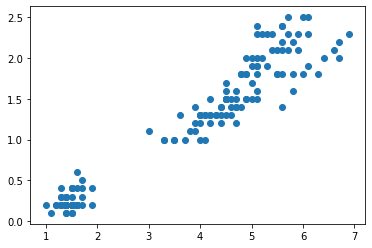

In [17]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [21]:
kmn = MinMaxScaler()

kmn.fit(df[['petal length (cm)']])
df['petal length (cm)'] = kmn.transform(df[['petal length (cm)']])

kmn.fit(df[['petal width (cm)']])
df['petal width (cm)'] = kmn.transform(df[['petal width (cm)']])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [42]:
km = KMeans(n_clusters=2)
pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['clustter'] = pred
df

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,petal length (cm),petal width (cm),clustter
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [43]:
df['clustter'].value_counts()

0    100
1     50
Name: clustter, dtype: int64

In [44]:
km.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

Text(0, 0.5, 'petal width (cm)')

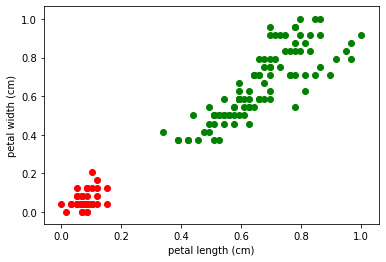

In [55]:
cl = df[df.clustter==0]
cl1 = df[df.clustter==1]

plt.scatter(cl['petal length (cm)'],cl['petal width (cm)'],color='green')
plt.scatter(cl1['petal length (cm)'],cl1['petal width (cm)'],color='red')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# To know how many cluster in it.

In [48]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

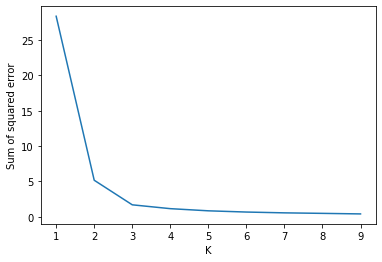

In [49]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)